# Relevant Title for Zillow Data Nerds

In [39]:
# imports

# SQL imports
from sqlalchemy import create_engine
from env import user, pw, host

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

Using the SQL zillow schema, write a query via Python to generate a cohesive data set that includes the following fields:

- `logerror`
- `bathroomcnt`
- `bedroomcnt`
- `calculatedfinishedsquarefeet`
- `fullbathcnt`
- `garagecarcnt`
- `roomcnt`
- `yearbuilt`
- `taxvaluedollarcnt`
- `taxamount`

### Read the data

In [40]:
full_df1 = pd.read_csv('~/Zillow/properties_2016.csv')
full_df2 = pd.read_csv('~/Zillow/train_2016_v2.csv')

In [41]:
full_df1.shape
full_df1.parcelid.nunique()

2985217

### Flatten down to only entries that have a valid logerror

In [42]:
df4 = full_df1.merge(full_df2, on='parcelid',how='inner')
df4.shape

(90275, 60)

In [43]:
df5 = df4.drop_duplicates(subset='parcelid', keep='first', inplace=False)
df5.shape

(90150, 60)

In [44]:
df = df5

In [45]:
df.shape

(90150, 60)

### Explore all columns

In [46]:
df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

### Trim columns down to project's scope

### New dataframe within project's scope

In [47]:
a_df = df[['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',\
           'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']]

In [48]:
a_df.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
0,0.0953,2.5,3.0,1264.0,2.0,2.0,5.0,1986.0,191811.0,2015.06
1,0.0198,1.0,2.0,777.0,1.0,1.0,4.0,1990.0,239679.0,2581.30
2,0.0060,2.0,3.0,1101.0,2.0,2.0,5.0,1956.0,47853.0,591.64
3,-0.0566,1.5,2.0,1554.0,1.0,2.0,5.0,1965.0,62914.0,682.78
4,0.0573,2.5,4.0,2415.0,2.0,2.0,8.0,1984.0,554000.0,5886.92


### Check for null values

In [49]:
a_df.isnull().sum()

logerror                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet      658
fullbathcnt                      1176
garagecarcnt                    60253
roomcnt                             0
yearbuilt                         753
taxvaluedollarcnt                   1
taxamount                           6
dtype: int64

### Dropping garagecarcnt since ~67% do not have values

In [50]:
a_df = a_df.drop(columns=['garagecarcnt'])

In [51]:
a_df.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
0,0.0953,2.5,3.0,1264.0,2.0,5.0,1986.0,191811.0,2015.06
1,0.0198,1.0,2.0,777.0,1.0,4.0,1990.0,239679.0,2581.30
2,0.0060,2.0,3.0,1101.0,2.0,5.0,1956.0,47853.0,591.64
3,-0.0566,1.5,2.0,1554.0,1.0,5.0,1965.0,62914.0,682.78
4,0.0573,2.5,4.0,2415.0,2.0,8.0,1984.0,554000.0,5886.92


### Handle nulls

In [52]:
b_df = a_df.dropna(axis='rows')

In [53]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88879 entries, 0 to 90274
Data columns (total 9 columns):
logerror                        88879 non-null float64
bathroomcnt                     88879 non-null float64
bedroomcnt                      88879 non-null float64
calculatedfinishedsquarefeet    88879 non-null float64
fullbathcnt                     88879 non-null float64
roomcnt                         88879 non-null float64
yearbuilt                       88879 non-null float64
taxvaluedollarcnt               88879 non-null float64
taxamount                       88879 non-null float64
dtypes: float64(9)
memory usage: 6.8 MB


In [54]:
b_df.isnull().sum()

logerror                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fullbathcnt                     0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
dtype: int64

In [55]:
b_df.shape

(88879, 9)

### Removing roomcnt as there is too many with a value of 0 as well as it's an aggregate of bedrooms/baths

In [56]:
df_roomcnt = b_df[['roomcnt']]
b_df = b_df.drop(columns=('roomcnt'))

In [57]:
df = b_df

### Data Summary

In [58]:

def summarize_df(df):
    print("Summary of Data\n")
    print("Rows & Columns:\n")
    print(df.shape)
    print("Variables:\n")
    var_names = df.columns.values
    print(var_names)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nNumeric Summary Stats:\n")
    print(df.describe())
    print("\nTop 5 Values:\n")
    for var in var_names:
        print(var+":")
        print(df[var].value_counts().head())
        print('\n')
    print("\nMissing Values:\n")
    null_counts = df.isnull().sum()
    if len(null_counts[null_counts > 0]) == 0:
        print("No missing values")
    else:
        print(null_counts[null_counts > 0])
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nEnd of Summary")

In [59]:
summarize_df(df)

Summary of Data

Rows & Columns:

(88879, 8)
Variables:

['logerror' 'bathroomcnt' 'bedroomcnt' 'calculatedfinishedsquarefeet'
 'fullbathcnt' 'yearbuilt' 'taxvaluedollarcnt' 'taxamount']

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88879 entries, 0 to 90274
Data columns (total 8 columns):
logerror                        88879 non-null float64
bathroomcnt                     88879 non-null float64
bedroomcnt                      88879 non-null float64
calculatedfinishedsquarefeet    88879 non-null float64
fullbathcnt                     88879 non-null float64
yearbuilt                       88879 non-null float64
taxvaluedollarcnt               88879 non-null float64
taxamount                       88879 non-null float64
dtypes: float64(8)
memory usage: 6.1 MB
None

Numeric Summary Stats:

           logerror   bathroomcnt    bedroomcnt  calculatedfinishedsquarefeet  \
count  88879.000000  88879.000000  88879.000000                  88879.000000   
mean       0.01142

### Create column names variable

In [60]:
colnames = df.columns
colnames

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'],
      dtype='object')

### Create list of all independent variables

In [61]:
x_vars = df.drop(columns=('logerror'))
full_vars = df # to use after prepping data
x_vars.head()
full_vars.shape

(88879, 8)

### Identify target variable

In [62]:
y_var = df[['logerror']]
y_var.shape

(88879, 1)

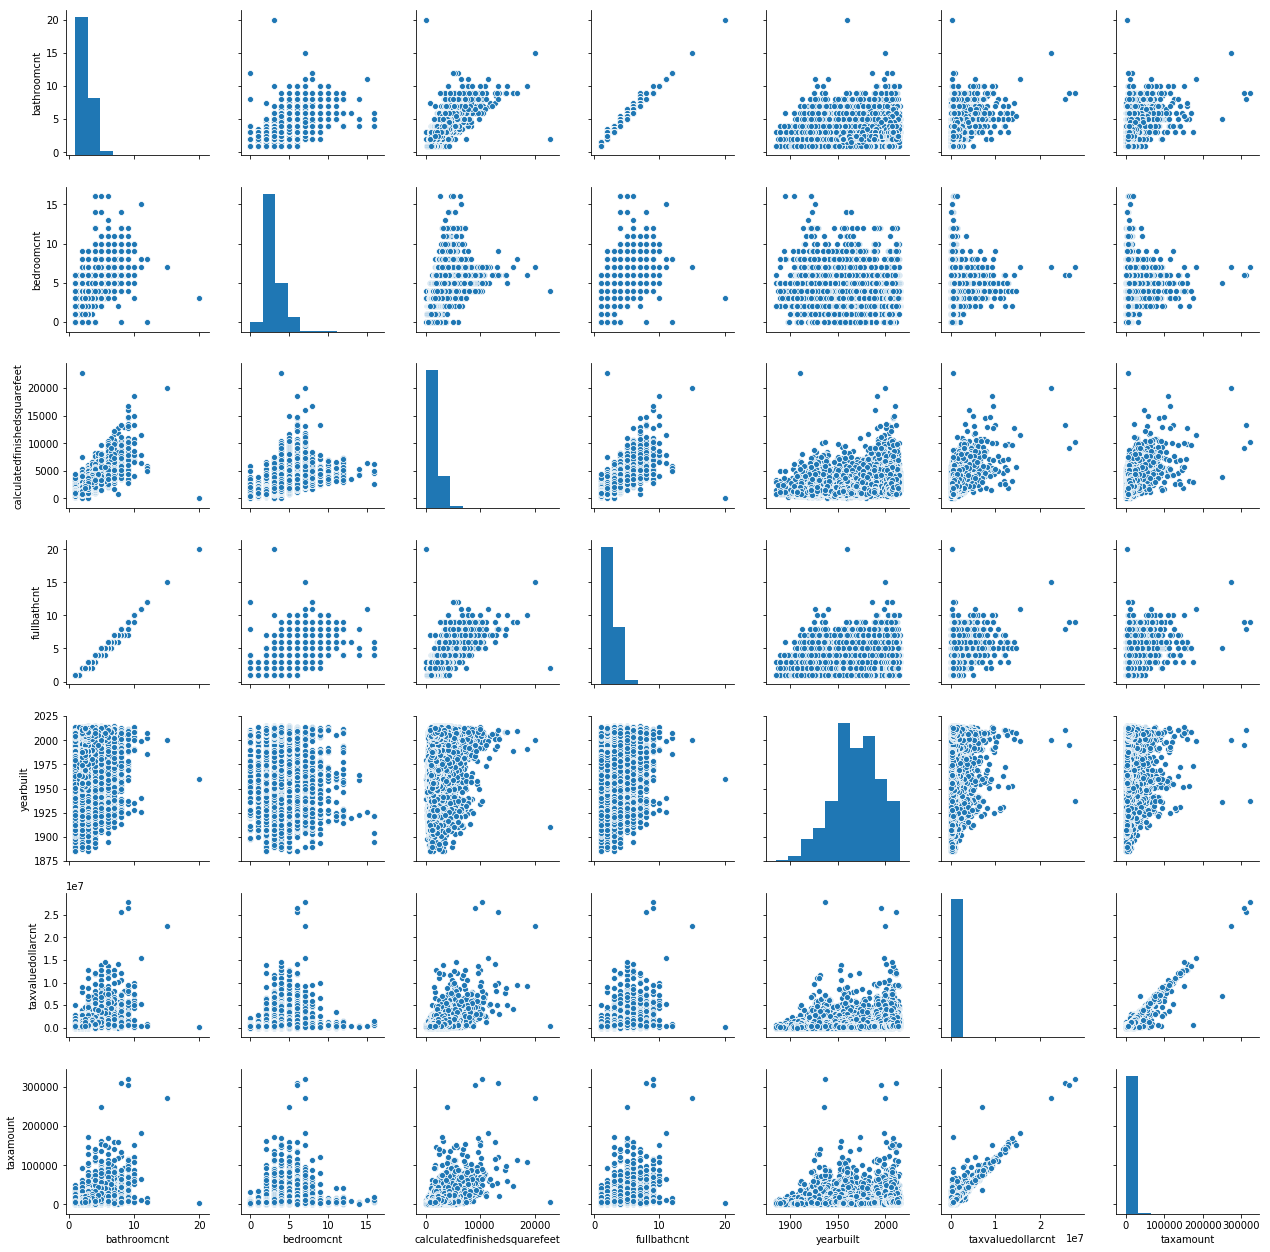

In [63]:
sns.pairplot(x_vars)

### Find NaN and > 0 

In [64]:
def percent_NaNs(df):
    cols = list(df.columns)
    Nans = {}
    for col in cols:
        Nans[col] = 'Missing {:0.2f}%'.format((df[col].isnull().sum()/df.shape[0]*100))
    return Nans

In [65]:
percent_NaNs(full_vars)

{'logerror': 'Missing 0.00%',
 'bathroomcnt': 'Missing 0.00%',
 'bedroomcnt': 'Missing 0.00%',
 'calculatedfinishedsquarefeet': 'Missing 0.00%',
 'fullbathcnt': 'Missing 0.00%',
 'yearbuilt': 'Missing 0.00%',
 'taxvaluedollarcnt': 'Missing 0.00%',
 'taxamount': 'Missing 0.00%'}

In [66]:
def percent_nonzero(full_vars):
    cols = list(df.columns)
    Zeros = {}
    for col in cols:
        Zeros[col] = 'non-zero-percent = {:0.2f}%'.format(((df[col]>0).sum()/df.shape[0]*100))
    return Zeros

In [67]:
percent_nonzero(df)

{'logerror': 'non-zero-percent = 55.17%',
 'bathroomcnt': 'non-zero-percent = 100.00%',
 'bedroomcnt': 'non-zero-percent = 99.69%',
 'calculatedfinishedsquarefeet': 'non-zero-percent = 100.00%',
 'fullbathcnt': 'non-zero-percent = 100.00%',
 'yearbuilt': 'non-zero-percent = 100.00%',
 'taxvaluedollarcnt': 'non-zero-percent = 100.00%',
 'taxamount': 'non-zero-percent = 100.00%'}

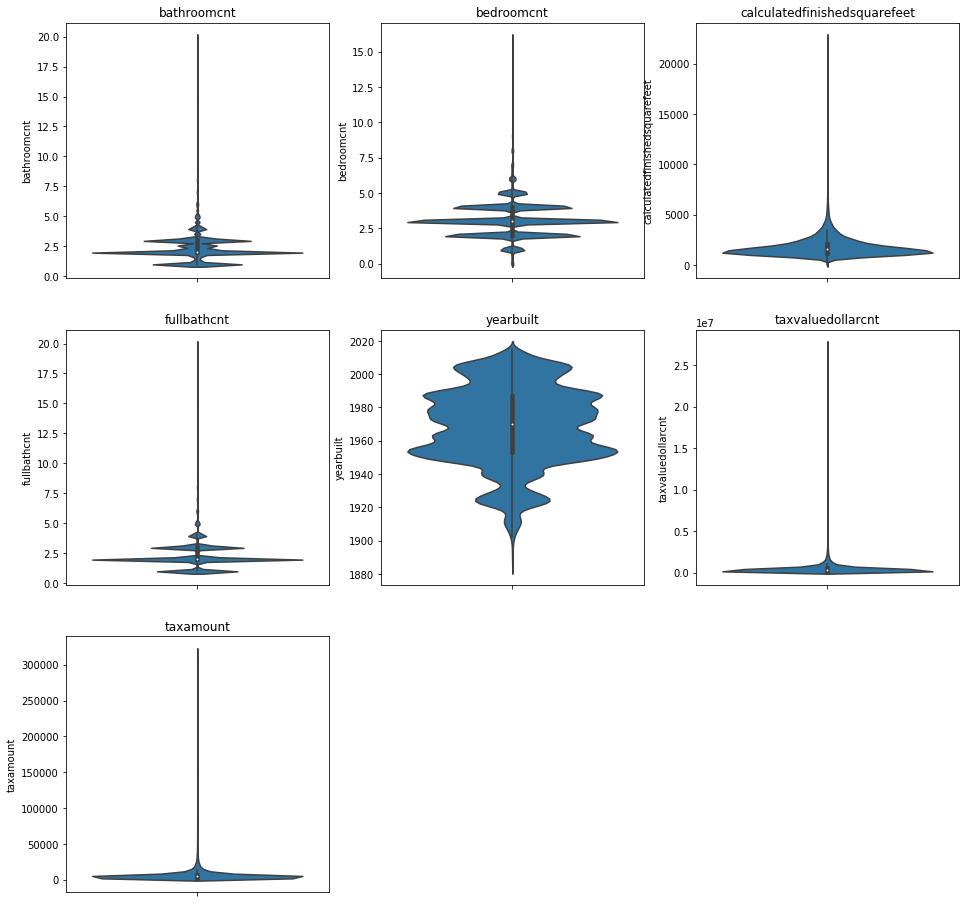

In [68]:
plt.figure(figsize=(16,16))

for i, col in enumerate(x_vars):
    plot_number = i + 1
    series = x_vars[col]
    plt.subplot(3,3,plot_number)
    plt.title(col)
    sns.violinplot(series, orient='v')

In [69]:
def trimoutliers(df):
    df[df.apply(lambda x :(x-x.mean()).abs()<=(2*x.std()) ).all(1)]
    return df

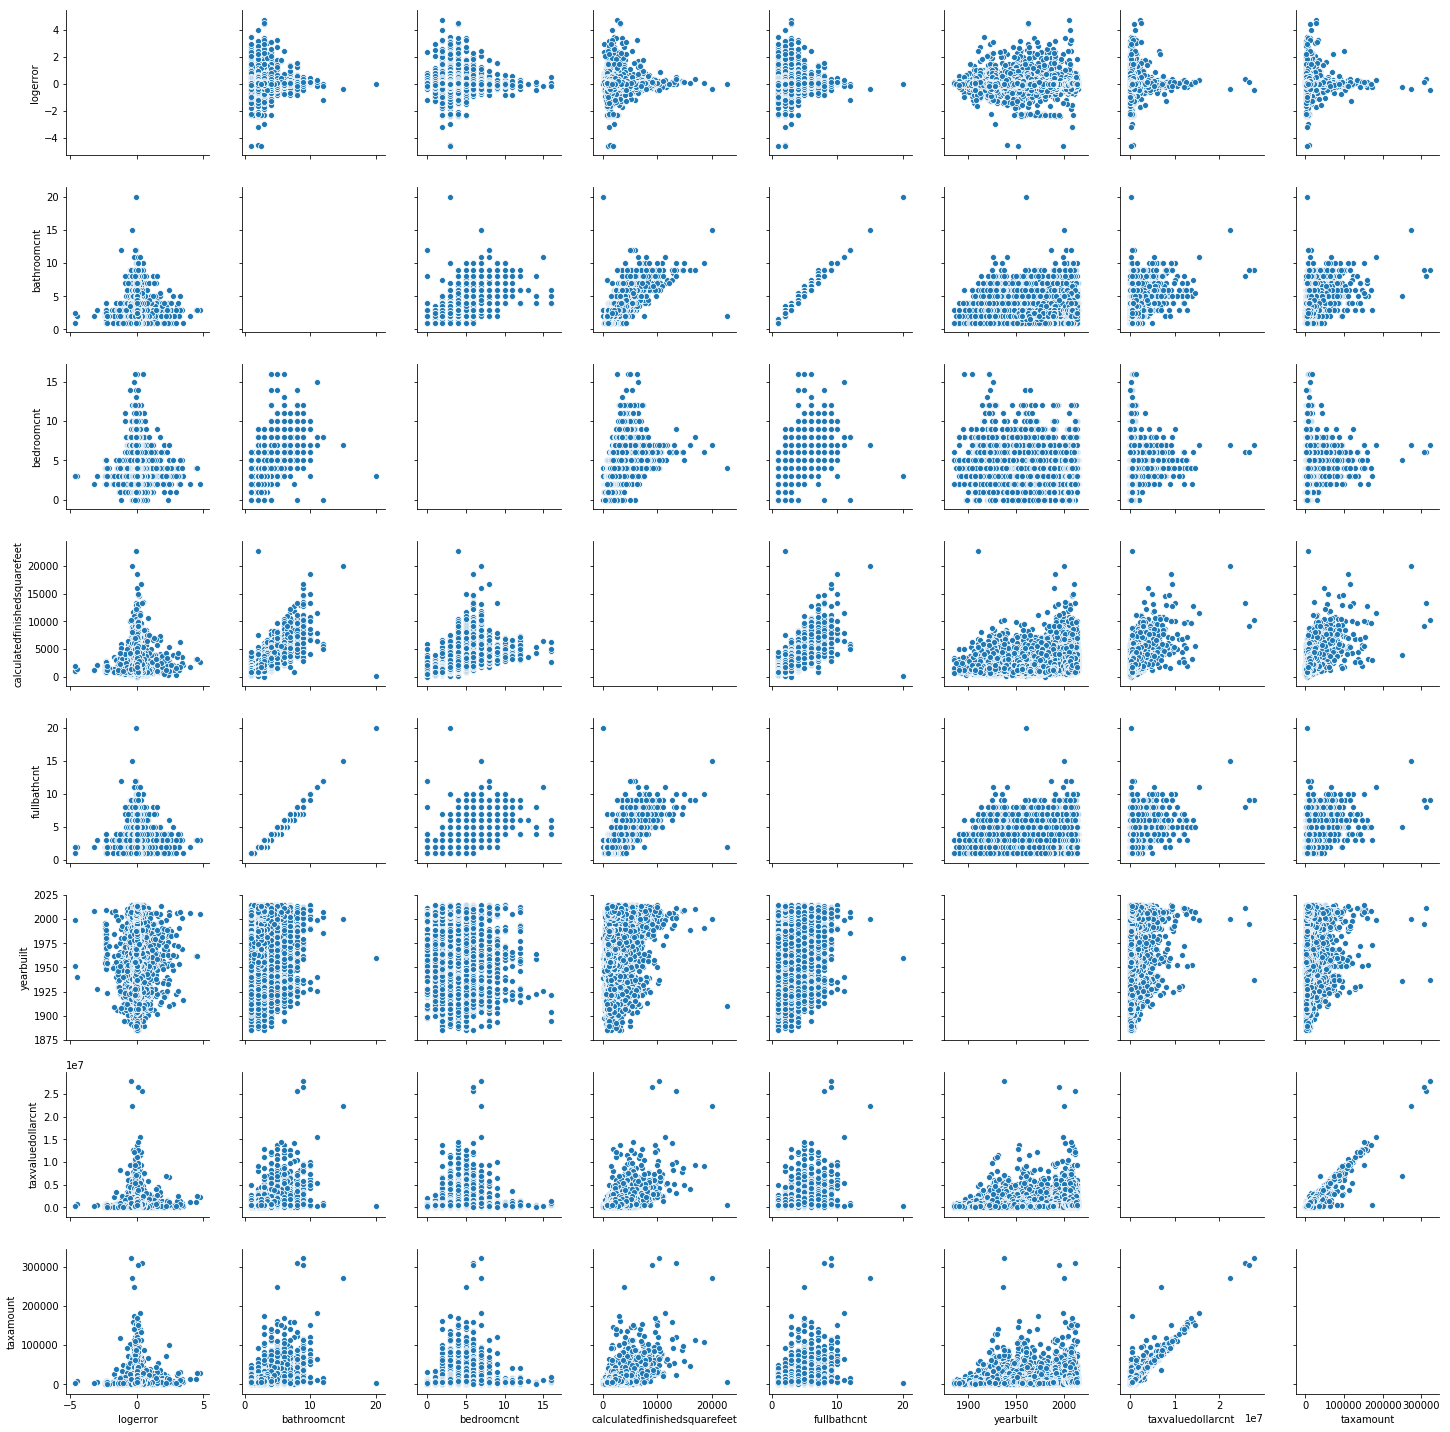

In [70]:
sns.pairplot(full_vars, diag_kind='reg')

### Trimming outliers

### Dropping fullbathcnt (aggregage)

In [71]:
x_vars = x_vars.drop(columns=('fullbathcnt'))
full_vars = full_vars.drop(columns=('fullbathcnt'))


In [72]:
print(x_vars.shape)
print(full_vars.shape)

(88879, 6)
(88879, 7)


In [73]:
x_vars.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount
count,88879.000000,88879.000000,88879.000000,88879.000000,8.887900e+04,88879.000000
mean,2.308875,3.069488,1768.297686,1968.590713,4.576035e+05,5972.244672
std,0.975543,1.109281,923.786902,23.766103,5.534683e+05,6804.606567
min,1.000000,0.000000,2.000000,1885.000000,2.200000e+01,49.080000
25%,2.000000,2.000000,1182.000000,1953.000000,2.004310e+05,2882.055000
50%,2.000000,3.000000,1537.000000,1970.000000,3.436840e+05,4545.140000
75%,3.000000,4.000000,2088.000000,1987.000000,5.405890e+05,6892.925000
max,20.000000,16.000000,22741.000000,2015.000000,2.775000e+07,321936.090000


In [74]:
x_vars.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount
0,2.5,3.0,1264.0,1986.0,191811.0,2015.06
1,1.0,2.0,777.0,1990.0,239679.0,2581.30
2,2.0,3.0,1101.0,1956.0,47853.0,591.64
3,1.5,2.0,1554.0,1965.0,62914.0,682.78
4,2.5,4.0,2415.0,1984.0,554000.0,5886.92


In [75]:
new_x_vars = x_vars.copy()

for col in x_vars:
    q1 = x_vars[col].quantile(.03)
    q3 = x_vars[col].quantile(.97)
    new_x_vars = new_x_vars[(new_x_vars[col] >= q1) & (new_x_vars[col] <= q3)]

new_x_vars.shape

(73005, 6)

In [76]:
df.shape

(88879, 8)

In [77]:
new_full_vars = full_vars.copy()

for col in full_vars:
    q1 = full_vars[col].quantile(.03)
    q3 = full_vars[col].quantile(.97)
    new_full_vars = new_full_vars[(new_full_vars[col] >= q1) & (new_full_vars[col] <= q3)]

new_full_vars.shape

(69373, 7)

In [78]:
new_full_vars.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount
0,0.0953,2.5,3.0,1264.0,1986.0,191811.0,2015.06
1,0.0198,1.0,2.0,777.0,1990.0,239679.0,2581.30
4,0.0573,2.5,4.0,2415.0,1984.0,554000.0,5886.92
5,0.0564,2.5,4.0,2882.0,1980.0,289609.0,3110.44
6,0.0315,2.0,3.0,1772.0,1978.0,526000.0,5632.20


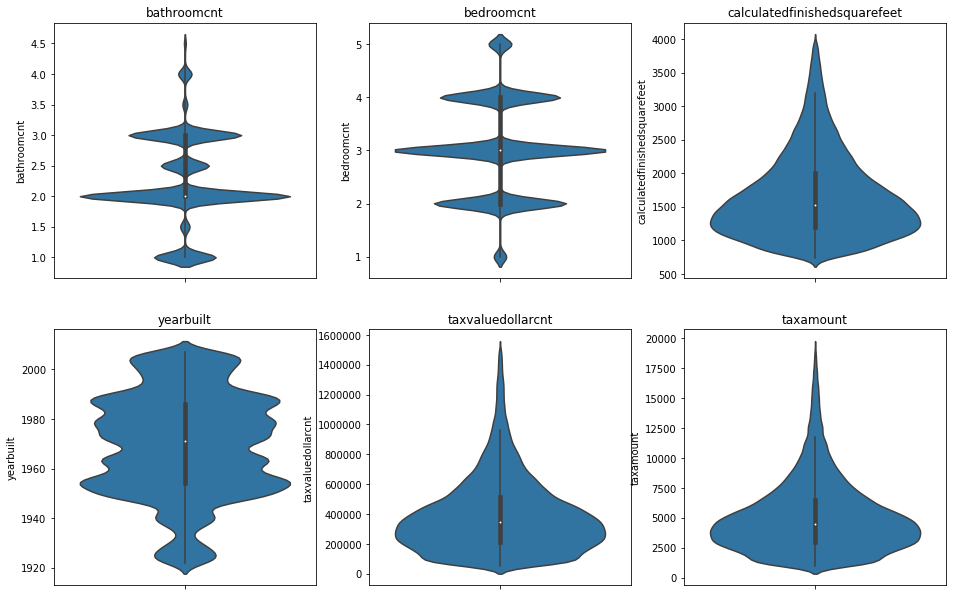

In [79]:
plt.figure(figsize=(16,16))

for i, col in enumerate(new_x_vars):
    plot_number = i + 1
    series = new_x_vars[col]
    plt.subplot(3,3,plot_number)
    plt.title(col)
    sns.violinplot(series, orient='v')

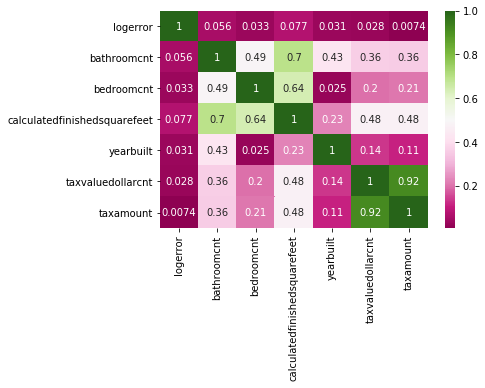

In [80]:
sns.heatmap(new_full_vars.corr(), cmap='PiYG', annot=True)

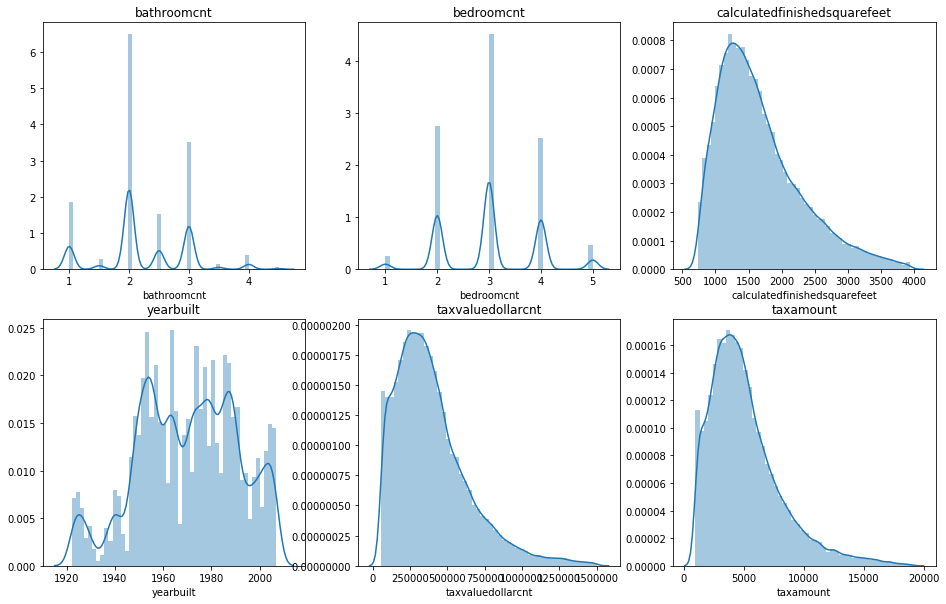

In [81]:
plt.figure(figsize=(16,10))

for i, col in enumerate(new_full_vars.drop(columns=('logerror'))):
    plot_number = i + 1
    series = new_full_vars[col]
    plt.subplot(2,3,plot_number)
    plt.title(col)
    sns.distplot(series)

### Distribution looks much better after trimming top and bottom 3% out

### Time to split into test/train

In [82]:
new_full_vars.shape

(69373, 7)

In [83]:
X = new_full_vars.drop(['logerror'], axis=1)
print(X.head())

y = new_full_vars[['logerror']]
print(y.head())

   bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  yearbuilt  \
0          2.5         3.0                        1264.0     1986.0   
1          1.0         2.0                         777.0     1990.0   
4          2.5         4.0                        2415.0     1984.0   
5          2.5         4.0                        2882.0     1980.0   
6          2.0         3.0                        1772.0     1978.0   

   taxvaluedollarcnt  taxamount  
0           191811.0    2015.06  
1           239679.0    2581.30  
4           554000.0    5886.92  
5           289609.0    3110.44  
6           526000.0    5632.20  
   logerror
0    0.0953
1    0.0198
4    0.0573
5    0.0564
6    0.0315


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.60, random_state=0)

In [85]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'logerror']
Train dimensions (rows, columns): (41623, 7)


In [86]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'logerror']
Test dimensions (rows, columns): (27750, 7)


In [87]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.60
Test Split: 0.40


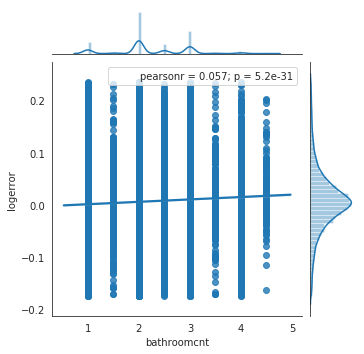

In [88]:
with sns.axes_style('white'):
    j = sns.jointplot("bathroomcnt", "logerror", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

In [89]:
X_train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount
53774,2.0,2.0,1027.0,1985.0,330000.0,4083.43
25571,1.5,1.0,1022.0,1993.0,407000.0,4816.00
35233,3.0,3.0,1643.0,1991.0,292780.0,3623.56
81459,2.0,3.0,1384.0,1961.0,453000.0,6130.69
38396,2.0,3.0,1118.0,1961.0,372292.0,5264.47


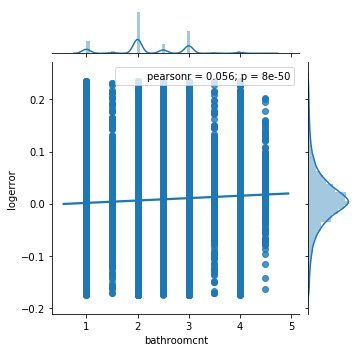

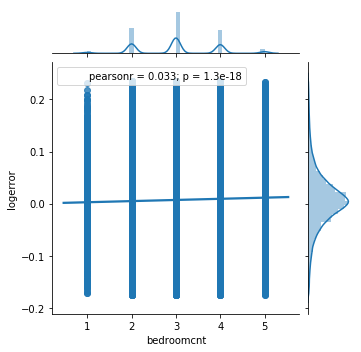

In [90]:
for i, col in enumerate(['bathroomcnt', 'bedroomcnt']):
    series = X[col]
    j2 = sns.jointplot(series, 'logerror', data=new_full_vars, kind='reg', height=5)
    j2.annotate(stats.pearsonr)

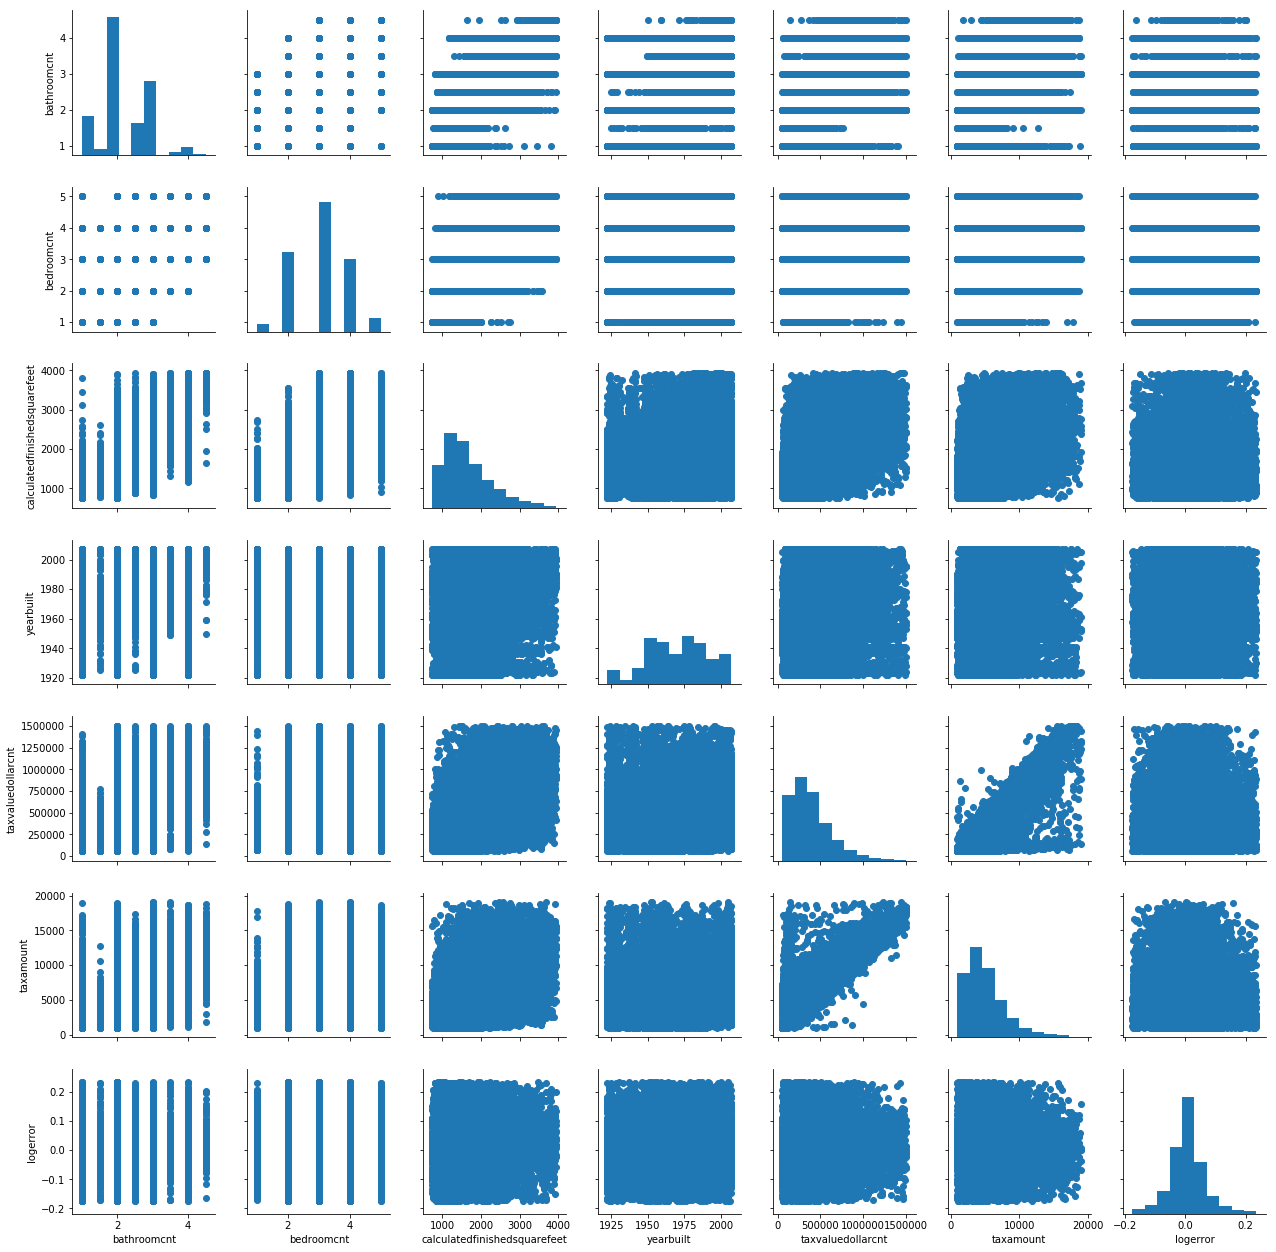

In [91]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [92]:
[[column, pearsonr(train[column], train.logerror)] for column in X_train] 

[['bathroomcnt', (0.056715459948763036, 5.210666637883862e-31)],
 ['bedroomcnt', (0.03974642978935479, 4.982803574432867e-16)],
 ['calculatedfinishedsquarefeet',
  (0.07732815103157303, 3.138137748292498e-56)],
 ['yearbuilt', (0.030334630905619536, 6.015518750750232e-10)],
 ['taxvaluedollarcnt', (0.0245258373146865, 5.606713647228584e-07)],
 ['taxamount', (0.005172107183160717, 0.2913457685388526)]]

In [93]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.logerror) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'bathroomcnt': (0.056715459948763036, 5.210666637883862e-31),
 'bedroomcnt': (0.03974642978935479, 4.982803574432867e-16),
 'calculatedfinishedsquarefeet': (0.07732815103157303, 3.138137748292498e-56),
 'yearbuilt': (0.030334630905619536, 6.015518750750232e-10),
 'taxvaluedollarcnt': (0.0245258373146865, 5.606713647228584e-07),
 'taxamount': (0.005172107183160717, 0.2913457685388526)}

In [94]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          7.56e-203
Time:                        09:11:19   Log-Likelihood:                 59669.
No. Observations:               41623   AIC:                        -1.193e+05
Df Residuals:                   41617   BIC:                        -1.193e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                      0.0006      0.001      1.029      0.303      -0.001       0.002
bedroomcnt                      -0.0014      0.000     -3.322      0.001      -0.002      -0.001
calculatedfinishedsquarefeet  9.408e-06   7.73e-07     12.170      0.000    7.89e-06    1.09e-05
yearbuilt                    -9.952e-07   5.83e-07     -1.706      0.088   -2.14e-06    1.48e-07
taxvaluedollarcnt              2.26e-08   2.85e-09      7.930      0.000     1.7e-08    2.82e-08
taxamount                    -2.526e-06   2.37e-07    -10.678      0.000   -2.99e-06   -2.06e-06
==============================================================================
Omnibus:                     2693.362   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7130.006
Skew:                           0.369   Prob(JB):                         0.00
Kurtosis:                       4.888   Cond. No.                     9.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
X_train2 = X_train

In [96]:
X_train2 = X_train.drop(columns=['bathroomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'])
# y_train2 = y_train.drop(columns=['bathroomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'])

In [97]:
ols_model2 = sm.OLS(y_train, X_train2)
fit2 = ols_model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     412.7
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          3.37e-178
Time:                        09:11:19   Log-Likelihood:                 59600.
No. Observations:               41623   AIC:                        -1.192e+05
Df Residuals:                   41621   BIC:                        -1.192e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bedroomcnt                      -0.0020      0.000     -5.993      0.000      -0.003      -0.001
calculatedfinishedsquarefeet  7.801e-06    5.8e-07     13.455      0.000    6.66e-06    8.94e-06
==============================================================================
Omnibus:                     2651.181   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7069.326
Skew:                           0.361   Prob(JB):                         0.00
Kurtosis:                       4.886   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [112]:
lm1.fit(X_train2, y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-0.00342982]
[[-1.10739439e-03  8.13359737e-06]]


In [108]:
y_pred_lm1 = lm1.predict(X_train2)

In [117]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 0.00334


In [120]:
r2_lm2 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance of logerror can be explained by doing this correctly, as I have not done.')

  {:.2%} of the variance of logerror can be explained by doing this correctly, as I have not done.
